In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# grid_example = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]
grid_example =[[10,12,4,6],[9,11,3,5],[1,7,13,8],[2,0,15,14]]
# grid_example = [[0, 2], [1, 3]]
grid=grid_example

move=[[0,1],[1,0],[0,-1],[-1,0]]
n=len(grid)

def possible_step(i,j,grid,t,visited):
    if i<0 or j<0 or i>=n or j>=n or grid[i][j]>t or visited[i][j]:
        return False
    visited[i][j]=True
    if i==n-1 and j==n-1:
        return True
    result_1 = False
    for [k,l] in move:
        result_1 = result_1 or possible_step(i+k,j+l,grid,t,visited)
        # print(visited)
        # print()
    return result_1

possible_path_vs_time=[]

def swimtime(grid):
    low=grid[0][0]
    high=2500  #largest number in the grid
    result = high
    
    while low<=high:
        mid_point=(low+high)//2
        visited = [[False for _ in range(n)] for _ in range(n)]
        res = possible_step(0,0,grid,mid_point,visited)
        print(mid_point,res)
        if res:
            high = mid_point-1
            result = mid_point
            possible_path_vs_time.append([mid_point,visited])
        else:
            low=mid_point+1

    return result

swimtime(grid_example)
# print(possible_path_vs_time)

1255 True
632 True
320 True
164 True
86 True
47 True
28 True
18 True
13 False
15 True
14 True


14

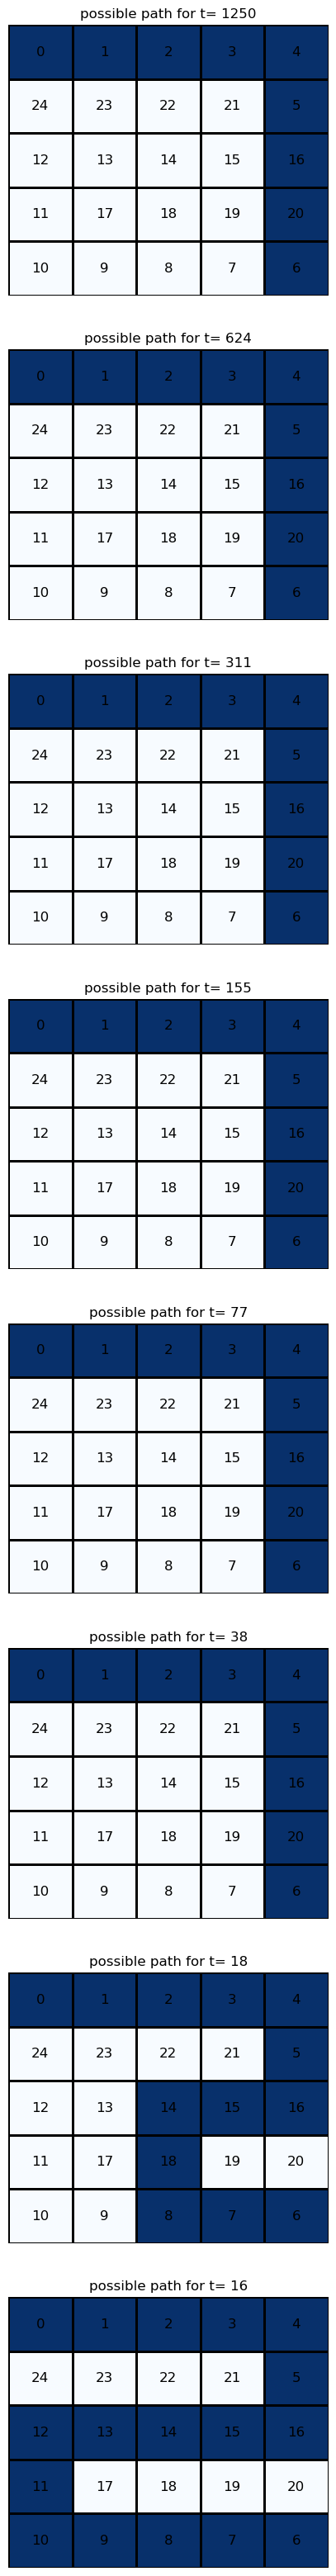

In [32]:
fig_number = len(possible_path_vs_time)
fig, ax = plt.subplots(fig_number,1, figsize=(5,5*fig_number))

for i in range(fig_number):
    sn.heatmap(data = grid,annot=True, cbar=False, annot_kws={'fontsize': 12, 'color':'k', 'alpha': 1,
                                                                   'verticalalignment': 'center'},cmap='Blues',ax=ax[i]) 
    sn.heatmap(data = possible_path_vs_time[i][1],annot=False,linewidths=2, 
                linecolor='k',cbar=False,cmap='Blues',xticklabels=False, yticklabels=False,ax=ax[i]) 
    ax[i].set(xlabel='', ylabel='', title='possible path for t= ' + str(possible_path_vs_time[i][0]))

  

  
# displaying the plotted heatmap 
plt.show()
